# C**lassification in Machine Learning**
- It is a type of **Supervised** Learning where the goal of algorithm is to **categorize** data into predefined classes
- Eg:
    - Supervised Anomaly Detection for fraud transaction 
    - Predicting if an employee will leave or stay in the company
    - Predict sentiment: happy, sad, neutral
- Types of Classification:
    - **Binary Classification** --> 2 classes/categories (0 or 1 - True or False) eg: Spam vs Non-spam emails.
    - **Multi-class Classification** --> more than 2 classes eg: Blood types A, B, O, etc
    - **Imbalanced Classification** --> when the distribution of classes is not balanced eg: Fraud where we have 2 million good transcations and 100k bad ones 
    - **Multi-label Classification** --> A type of classification that the classes have multiple labels associated with it. eg: A movie that belongs to multiple categories Action, Sci-Fi, etc
    - **Hierarchial Classification** --> involves classifying data into a hierarchy, where the classes are structured in a tree format eg: Animal Family -> Genus -> Species 

- Common Algorithms:
    - Logisitic Regression (Binary Classification)          -done
    - Decision Trees                                        -done
    - Random Forests                                        -future
    - Support Vector Machines (SVM)                         -today
    - k-Nearest Neighbor                                    -future
    - Naive Bayes                                           -future

### **SVM** Exercise

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#machine learning 
from sklearn import svm 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, accuracy_score, recall_score

#some are new

In [2]:
df = pd.read_csv('/home/vinayakgaur07/Downloads/heart.txt')
df.head()

,age,sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,slope,Ca,Thal,AHD
0,67,1,nontypical,167,407,0,0,168,1,4.1,2,0,reversable,no
1,57,1,nonanginal,176,445,0,0,158,1,0.6,2,0,normal,no
2,43,1,asymptomatic,110,351,0,0,179,0,3.9,1,0,reversable,no
3,71,1,typical,178,440,0,2,140,0,2.8,1,0,normal,no
4,36,1,asymptomatic,171,490,0,0,144,1,3.6,1,0,reversable,no


### EDA

In [3]:
# check distribution of target - imbalanced or not
df['AHD'].value_counts()

AHD
no     108
yes     92
Name: count, dtype: int64

In [4]:
df['ChestPain'].value_counts()

ChestPain
asymptomatic    73
nonanginal      57
nontypical      42
typical         28
Name: count, dtype: int64

Ratios are close so we have Balanced Data (and not Imbalanced Data)

In [5]:
df.isna().sum()

age          0
sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

In [6]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [7]:
df.duplicated().sum()

0

Checking for Outliers:

<Axes: xlabel='age'>

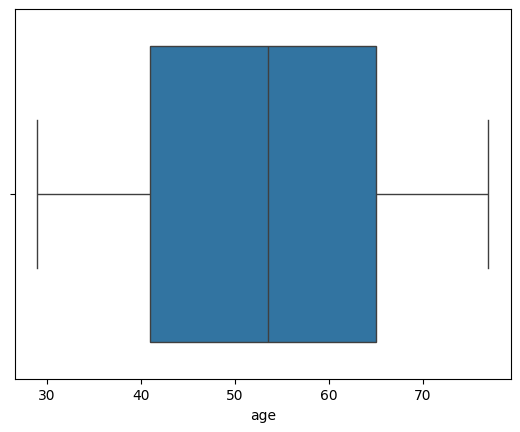

In [8]:
sns.boxplot(data=df, x='age')

In [9]:
df.groupby('AHD')[['age']].agg(['mean','median','min','max'])

age               
          mean median min max
AHD                          
no   52.398148   52.0  29  76
yes  53.695652   55.5  29  77

In [10]:
# sns.displot(data=df, x='age', hue='AHD', kind='kde', col='sex')

<Axes: xlabel='ChestPain', ylabel='age'>

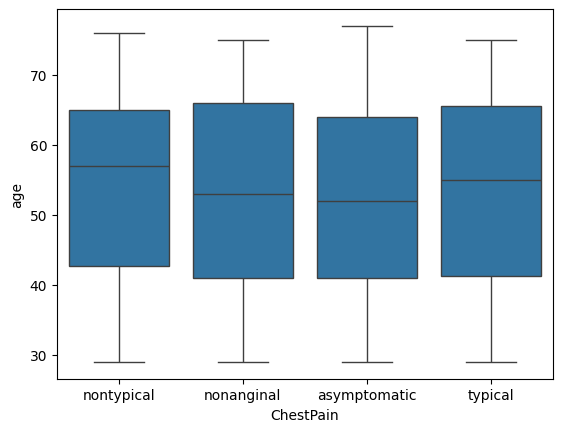

In [11]:
sns.boxplot(data=df, y='age', x='ChestPain')

<Axes: xlabel='ChestPain', ylabel='age'>

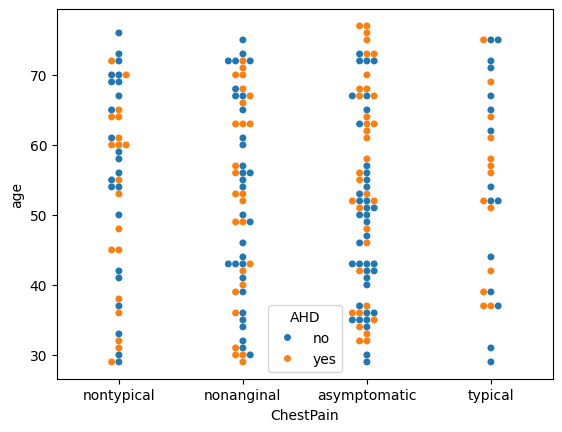

In [12]:
sns.swarmplot(data=df, y='age', x='ChestPain', hue='AHD')

>Asymptomatic has the highest count of AHD instances 

<Axes: xlabel='ChestPain', ylabel='age'>

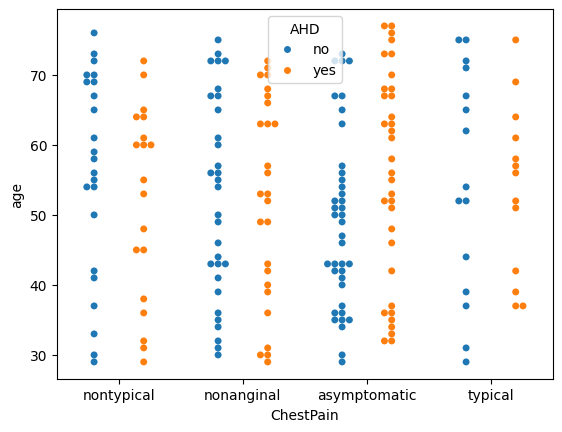

In [13]:
sns.swarmplot(data=df, y='age', x='ChestPain', hue='AHD', dodge=True)

### Data Preprocessing 
- Encoding 
    - Label Encoding: AHD
    - OneHot Encoding: Thal, ChestPain
- Scaling 

In [14]:
df['Thal'].unique()

array(['reversable', 'normal', 'fixed'], dtype=object)

In [15]:
df_org = df.copy()

> always copy the dataset before Encoding

In [16]:
df = pd.get_dummies(df, columns=['ChestPain', 'Thal'], dtype=int)
df.head()

,age,sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,slope,Ca,AHD,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
0,67,1,167,407,0,0,168,1,4.1,2,0,no,0,0,1,0,0,0,1
1,57,1,176,445,0,0,158,1,0.6,2,0,no,0,1,0,0,0,1,0
2,43,1,110,351,0,0,179,0,3.9,1,0,no,1,0,0,0,0,0,1
3,71,1,178,440,0,2,140,0,2.8,1,0,no,0,0,0,1,0,1,0
4,36,1,171,490,0,0,144,1,3.6,1,0,no,1,0,0,0,0,0,1


For **Label** Encoding, we can use : **`factorize()`** or **`map()`**

In [17]:
df['AHD'] = df['AHD'].map({'yes':1, 'no':0})
df.head()

,age,sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,slope,Ca,AHD,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
0,67,1,167,407,0,0,168,1,4.1,2,0,0,0,0,1,0,0,0,1
1,57,1,176,445,0,0,158,1,0.6,2,0,0,0,1,0,0,0,1,0
2,43,1,110,351,0,0,179,0,3.9,1,0,0,1,0,0,0,0,0,1
3,71,1,178,440,0,2,140,0,2.8,1,0,0,0,0,0,1,0,1,0
4,36,1,171,490,0,0,144,1,3.6,1,0,0,1,0,0,0,0,0,1


### Split the data

In [18]:
X = df.drop(columns='AHD', axis=1)
y = df['AHD']

In [19]:
MMS = MinMaxScaler()

X_scaled = MMS.fit_transform(X)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=4)

### Training SVM
- Support Vector Machines - powerful and popular ML algorithm
- It can be used for both Regression and Classification:
    - Regression: `SupportVectorRegressor`
    - Classification: `SupportVectorClassifier`
- SVM searches for a hyperplane that best separates the classes using feature space (also called Decision Boundary)
- Components of Decision Boundary:
    - **Support Vectors** --> data points that are closest to the hyperplane 
    - **Margins** --> the distance between the hyperplane and the support vectors 
    - **Kernels** --> gives SVM the ability  to handle non-linear relationships

![svm](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQPPCoKbF0mLMvu5h0a_6TcV1WaBPFcaBH1WQ&s)

**Hyperparameters**
- `C` --> the regularization intensity
- `gamma` --> controls the width of the kernel to adjust smoothness of the hyperplane or decision boundary
- `kernel` --> it helps switch from linear, polynomial, sigmoid, etc 

![gamma](https://scikit-learn.org/stable/_images/sphx_glr_plot_rbf_parameters_001.png)

> use GridSearchCV for hyperparameter tuning 

In [21]:
svc_model = svm.SVC()

param_grid = {
                'C':[1,5,10,20,100,500],
                'gamma':[1,0.5,0.1,0.01,0.001],
                'kernel':['linear','rbf','sigmoid']
}

- Standard KFold may not guarantee a class balance in every fold
- Therefore, we use `StratifiedKFold` to maintain class proportions for every fold 
- This is mainly useful when we have imbalanced data (low proportion distribution of the class)

In [22]:
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=2)

apply gridsearchcv on this model

In [23]:
gs_svc_model = GridSearchCV(svc_model, param_grid, cv=skf)

In [24]:
gs_svc_model.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",SVC()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'C': [1, 5, ...], 'gamma': [1, 0.5, ...], 'kernel': ['linear', 'rbf', ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",StratifiedKFo... shuffle=True)
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score 

In [25]:
print(gs_svc_model.best_params_)

{'C': 100, 'gamma': 1, 'kernel': 'linear'}


In [26]:
gs_svc_model.best_score_

0.95625

## Performance Measurement in Classification
- Accuracy is not the only measure we need to consider for Classification performance
- In order to understand all the measures, we need to start with the confusion matrix

In [27]:
#get the predicted values
y_pred_svm = gs_svc_model.best_estimator_.predict(X_test)
y_pred_svm

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [28]:
#build confusion matrix 
gs_svc_cm = confusion_matrix(y_test, y_pred_svm)
gs_svc_cm

array([[21,  2],
       [ 4, 13]])

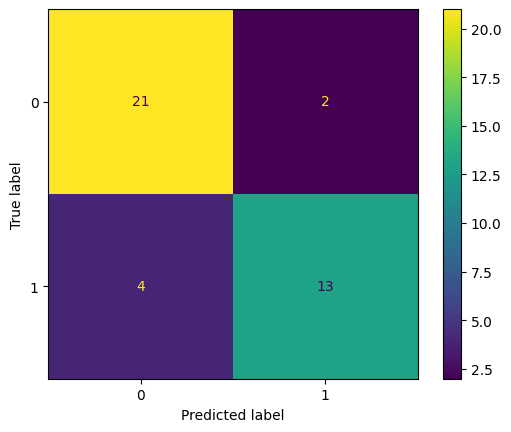

In [29]:
#visualizing the confusion matrix
cm_svc_display = ConfusionMatrixDisplay(confusion_matrix=gs_svc_cm)
cm_svc_display.plot()

- How to infer confusion matrix data:
    - (1,1) --> There are 13 no.of instances where the Patient **had** Heart Disease and my Model also predicts **presence** of Heart Disease = **`True Positive`**
    - (0,0) --> There are 21 instances where the Patient **didn't had** Heart Disease and Model also predicted **absence** of Heart Disease = **`True Negative`** 
    - (0,1) --> There are 4 instances where the Patient **had** Heart Disease and Model predicted **absence** of Heart Disease = **`False Negative`** 
    - (1,0) --> There are 2 instances where the Patient **didn't had** Heart Disease and Model predicted **presence** of Heart Disease = **`False Positive`**

- We have 34(21+13) instances where the model correctly classified the prediction of AHD
- We have 6(4+2) instances where the model misclassified the prediction of AHD --> Errors 
- The goal is to reduce the number of **False positive [`Type 1 Errors`]** and **False negative [`Type 2 Errors`]**
- In some cases, its hard to lower both numbers and we have to prioritize improving one over the other 

Deriving the Evaluation Metrics 

- **`Accuracy`**
    - Formula: **(True Positive + True Negative)/(True Positive + True Negative + False Positive + False Negative)**
    - The ratio of correctly predicted instances to the total instances 
    - It is preferred to use other metrics with accuracy

- **`Precision`** (aka **Positive Predicted Value**)
    - Formula: **TP/(TP + FP)**
    - The ratio of correctly predicted positives to the total of all predicted **positives**  

- **`Sensitivity`** (aka **Recall** or **True Positive Rate**)
    - Formula: **TP/(TP + FN)** 
    - The ratio of correctly predicted positives to the total of all original/actual positives (i.e., where y-axis = 1)

- **`Specificity`** (aka **True Negative Rate**)
    - Formula: **TN/(TN + FP)**
    - The ratio of correctly predicted negatives to the total of all original/actual negatives (i.e., where y-axis = 0)

- **`F1 Score`** (derived from Precision and Recall)
    - Formula: F1Score = **2 * (Precision * Recall)/(Precision + Recall)**
    - Harmonic Mean of Precision and Recall

For our AHD scenario here:
- Accuracy is useful to get a high level performace check on the prediction success
- If you have a model that predicts AHD and the cost of the incorrectly diagnosed patients is High(adding stress on hospital staff), you would prioritize **precision**
- If you have a model that predicts AHD and the priority is to catch as many true AHD diagnoses as possible, then you would prioritize **sensitivity or recall**

### Compare to a Different Model
- We will use Naive Bayes 
- It leverages the Bayes Theorem 


![NB](https://encrypted-tbn0.gstatic.com/resize:fit:600/images?q=tbn:ANd9GcTzo6RuClYi-zqcK67RsRG6OhUU3lxvVoKq2g&s)

In [31]:
#to import the above formula function:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


In [32]:
y_pred_nb = nb_model.predict(X_test)

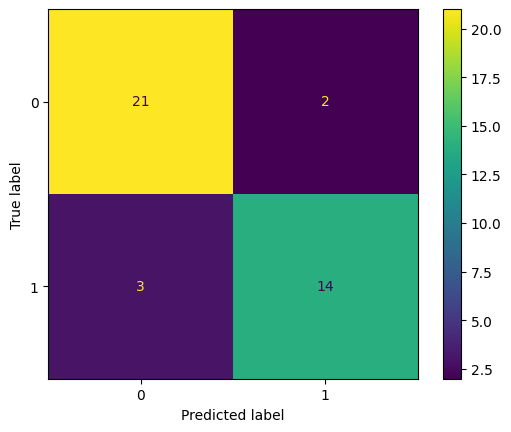

In [39]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_nb_display = ConfusionMatrixDisplay(confusion_matrix=cm_nb)
cm_nb_display.plot()

#### Model Final Comparision

Text(0.5, 1.0, 'Naive Bayes Confusion Matrix')

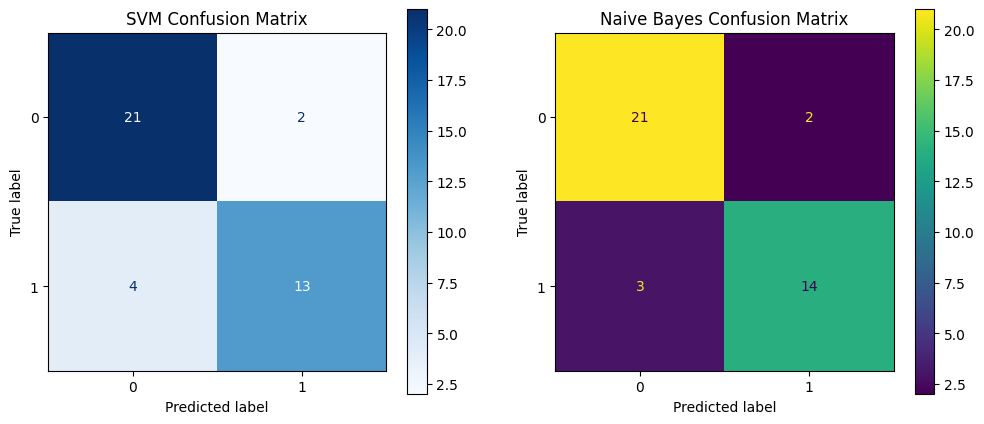

In [44]:
fig, axes = plt.subplots(1,2,figsize=(12,5))

cm_svc_display.plot(ax=axes[0], cmap='Blues')
axes[0].set_title('SVM Confusion Matrix')

cm_nb_display.plot(ax=axes[1])
axes[1].set_title('Naive Bayes Confusion Matrix')

> from comparision of above 2 we observe that --> Naive Bayes gave better performance cuz it predicted better 